#**PROJECT**

Assume as A Data Scientist with a housing agency, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

1. Is there a significant difference in the median value of houses bounded by the Charles river or not?

2. Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

3. Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

4. What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

5. Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic.

#Load Libraries


In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols

#Load  Data

In [35]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [36]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

# Generate Descriptive Statistics and Visualizations

For all visualizations, please include a title in each graph and appropriate labels

- For the "Median value of owner-occupied homes" provide a boxplot

Text(0.5, 1.0, 'Median value of owner-occupied homes')

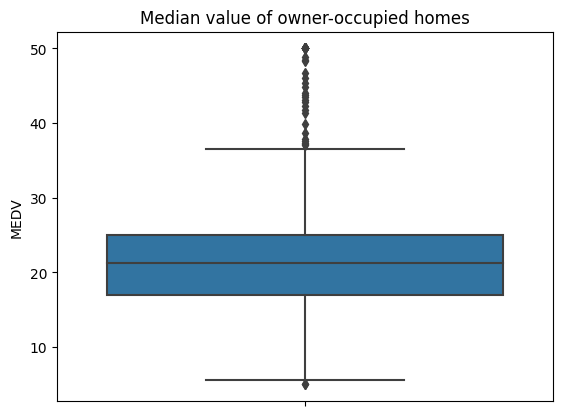

In [37]:
bp = sns.boxplot(data = boston_df, y = 'MEDV')
bp.set_title("Median value of owner-occupied homes")

In [38]:
print(f"Explanation: the median of median value of owner-occupied homes is {np.median(boston_df['MEDV'])}")

Explanation: the median of median value of owner-occupied homes is 21.2


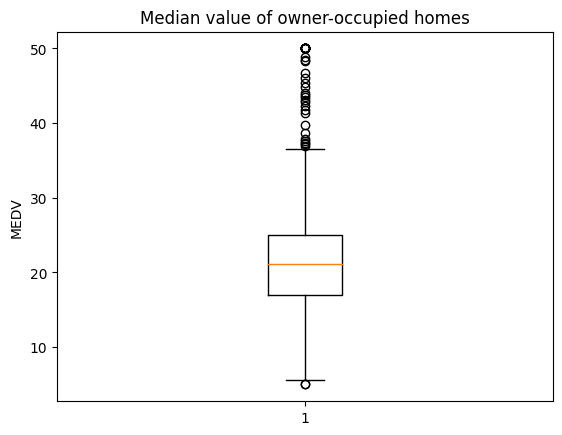

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(boston_df['MEDV'])

ax.set_title('Median value of owner-occupied homes')
ax.set_ylabel('MEDV')

plt.show()

- Provide a  bar plot for the Charles river variable

[Text(0, 0, 'Non-Charles River'), Text(1, 0, 'Charles River')]

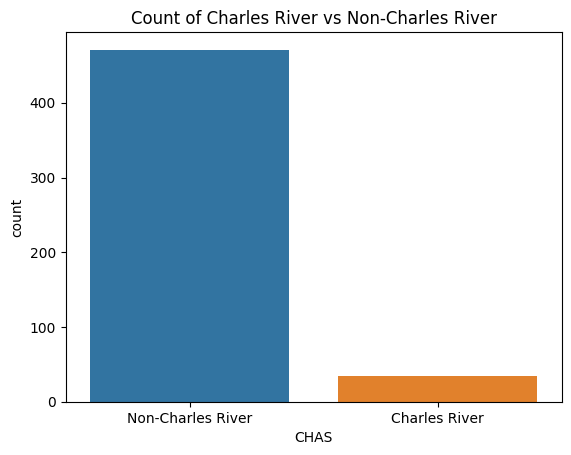

In [40]:
ax = sns.countplot(data=boston_df, x='CHAS')
ax.set_title('Count of Charles River vs Non-Charles River')
ax.set_xticklabels(['Non-Charles River', 'Charles River'])

Explanation: There are much more non-charles river data points than charles river data points

- Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [41]:
boston_df.loc[boston_df['AGE']<=35, 'age_group'] = '<=35'
boston_df.loc[(boston_df['AGE']>35) & (boston_df['AGE']<70), 'age_group'] = '35-70'
boston_df.loc[boston_df['AGE']>=70, 'age_group'] = '>=70'

Text(0.5, 1.0, 'MEDV Distribution by Age Group')

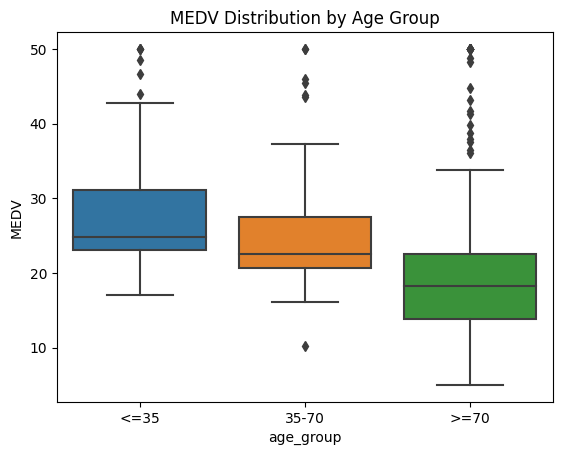

In [42]:
ax = sns.boxplot(boston_df, x = 'age_group', y = 'MEDV', order = ['<=35', '35-70', '>=70'])
ax.set_title('MEDV Distribution by Age Group')

Explanation: the older the houses, the less value

- Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0.5, 1.0, 'Relationship between INDUS vs NOX')

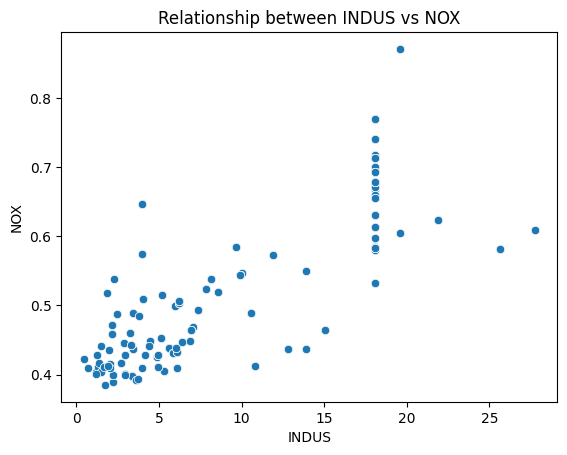

In [43]:
ax = sns.scatterplot(boston_df, x = 'INDUS', y = 'NOX')
ax.set_title('Relationship between INDUS vs NOX')

Explanation: by looking at the scatterplot, INDUS and NOX are postively correlated

- Create a histogram for the pupil to teacher ratio variable

Text(0.5, 1.0, 'Histogram of Pupil to Teacher Ratio')

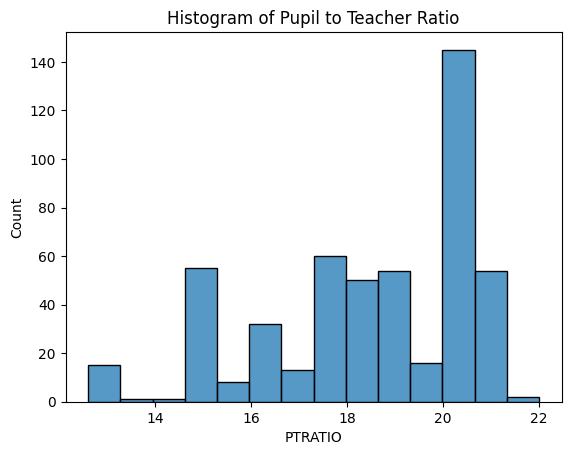

In [44]:
ax = sns.histplot(boston_df, x = 'PTRATIO')
ax.set_title('Histogram of Pupil to Teacher Ratio')

Explanation: the PTRATIO is a left skewed distribution. The mode is around the 20 bin. The median is between 18 and 20. Mean is less than median.

# Use the appropriate tests to answer the questions provided.

For each of the following questions, be sure to:
- State your hypothesis.
- Use α = 0.05
- Perform the test Statistics.
- State the conclusion from the test.

- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [45]:
print('Null Hypothesis: There is no significant difference in median value of houses bounded by the Charles river')
print('Alternate Hypothesis: There is significant difference in median value of houses bounded by the Charles river')

Null Hypothesis: There is no significant difference in median value of houses bounded by the Charles river
Alternate Hypothesis: There is significant difference in median value of houses bounded by the Charles river


Text(0.5, 1.0, 'Hitogram of MEDV by CHAS')

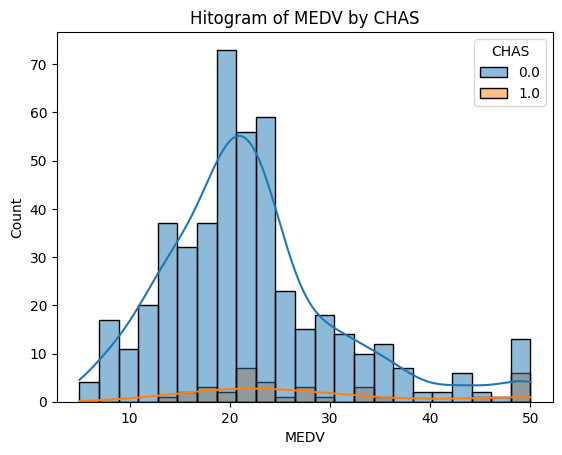

In [46]:
g = sns.histplot(boston_df, x='MEDV', hue = 'CHAS', kde = True)
g.set_title('Hitogram of MEDV by CHAS')

In [47]:
print('Beacuase the distribution is lightly tailed symmetry so choosing center=mean for levene test')
scipy.stats.levene(boston_df[boston_df['CHAS']==0]['MEDV'],boston_df[boston_df['CHAS']==1]['MEDV'], center = 'mean')

Beacuase the distribution is lightly tailed symmetry so choosing center=mean for levene test


LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [48]:
print("The variances are not equal. Thus perform Welch's t test")
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==0]['MEDV'],boston_df[boston_df['CHAS']==1]['MEDV'], equal_var=False)

The variances are not equal. Thus perform Welch's t test


TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

In [49]:
print('Becuase the p value is < 0.05, the median values of houses bounded by the Charles river or not have significant difference.')

Becuase the p value is < 0.05, the median values of houses bounded by the Charles river or not have significant difference.


- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [50]:
print('Null Hyperthesis: there is no difference of MEDV among age group')
print('Alternate Hyperthesis: there is significant difference of MEDV among age group')

Null Hyperthesis: there is no difference of MEDV among age group
Alternate Hyperthesis: there is significant difference of MEDV among age group


Text(0.5, 1.0, 'age:>=70')

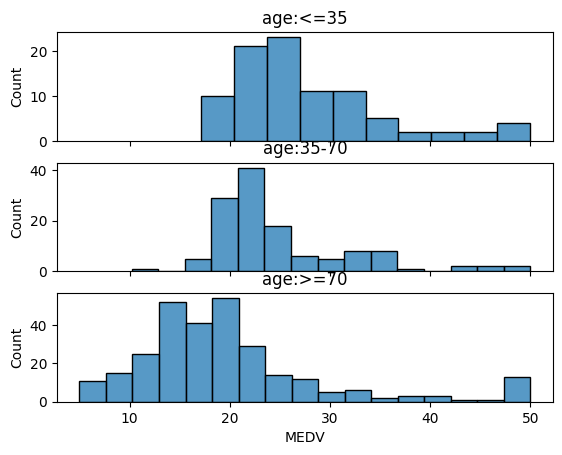

In [51]:
fig, axes = plt.subplots(3,1,sharex = True)
sns.histplot(ax=axes[0],data= boston_df[boston_df['age_group']=='<=35'], x = 'MEDV')
axes[0].set_title('age:<=35')
sns.histplot(ax=axes[1],data= boston_df[boston_df['age_group']=='35-70'], x = 'MEDV')
axes[1].set_title('age:35-70')
sns.histplot(ax=axes[2],data= boston_df[boston_df['age_group']=='>=70'], x = 'MEDV')
axes[2].set_title('age:>=70')

In [52]:
print('Beacuase the distribution is lightly tailed symmetry so choosing center=mean for levene test')
scipy.stats.levene(boston_df[boston_df['age_group']=='<=35']['MEDV'],
                   boston_df[boston_df['age_group']=='35-70']['MEDV'],
                   boston_df[boston_df['age_group']=='>=70']['MEDV'], center = 'mean')

Beacuase the distribution is lightly tailed symmetry so choosing center=mean for levene test


LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [53]:
print("The variances are not equal. Thus perform Alexander-Govern test")
scipy.stats.alexandergovern(boston_df[boston_df['age_group']=='<=35']['MEDV'],
                            boston_df[boston_df['age_group']=='35-70']['MEDV'],
                            boston_df[boston_df['age_group']=='>=70']['MEDV'])

The variances are not equal. Thus perform Alexander-Govern test


AlexanderGovernResult(statistic=70.11936965749803, pvalue=5.939807106272169e-16)

In [54]:
print('Becuase the p value is < 0.05, the median values of houses by different age groups are significantly different.')

Becuase the p value is < 0.05, the median values of houses by different age groups are significantly different.


- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [55]:
print('Null Hyperthesis: there is no relationship between NOX and INDUS')
print('Alternate Hyperthesis: there is relationship between NOX and INDUS')

Null Hyperthesis: there is no relationship between NOX and INDUS
Alternate Hyperthesis: there is relationship between NOX and INDUS


In [56]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061239527e-98)

In [57]:
print('Becuase the p value is < 0.05 and the statistic is positive, they are postively correlated')

Becuase the p value is < 0.05 and the statistic is positive, they are postively correlated


In [58]:
X = boston_df['INDUS']
y = boston_df['NOX']
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
predictions = model.predict(X)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    NOX   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           7.91e-98
Time:                        07:53:23   Log-Likelihood:                 594.45
No. Observations:                 506   AIC:                            -1185.
Df Residuals:                     504   BIC:                            -1176.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4110      0.006     64.710      0.0

In [59]:
print('The R-squred value matched the pearson correlation statistic to the power of 2. Also every acre increases will result in 0.012*10^7 parts increase of nitric oxides.')

The R-squred value matched the pearson correlation statistic to the power of 2. Also every acre increases will result in 0.012*10^7 parts increase of nitric oxides.


Text(0.5, 1.0, 'Acutal NOX vs Predictions')

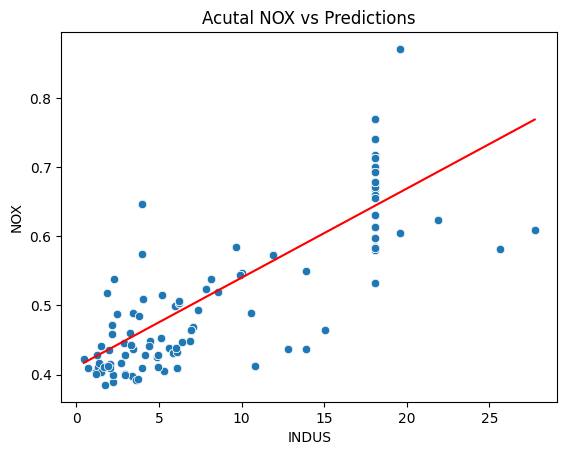

In [60]:
g = sns.scatterplot(boston_df, x = 'INDUS', y = 'NOX')
g = sns.lineplot(x = boston_df['INDUS'], y = predictions, color='red')
g.set_title('Acutal NOX vs Predictions')

Text(0.5, 1.0, 'Linear Regression Line between INDUS and NOX')

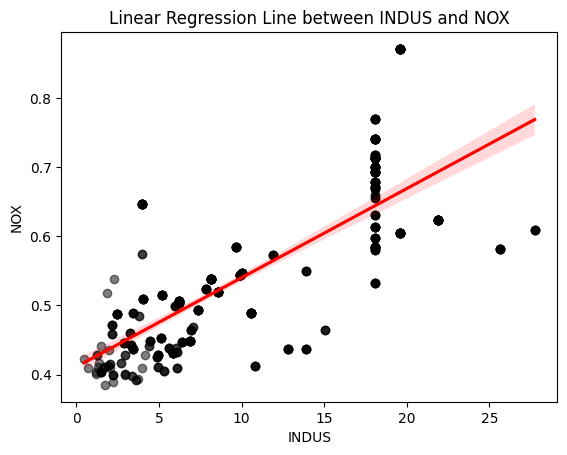

In [61]:
g = sns.regplot(boston_df, x = 'INDUS', y = 'NOX', scatter_kws = {"color": "black", "alpha": 0.5},
                                                line_kws = {"color": "red"})
g.set_title('Linear Regression Line between INDUS and NOX')

- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [62]:
print('Null Hyperthesis: there is no impact of an additional weighted distance to the five Boston employement centres on the MEDV')
print('Alternate Hyperthesis: there is significant impact of an additional weighted distance to the five Boston employement centres on the MEDV')

Null Hyperthesis: there is no impact of an additional weighted distance to the five Boston employement centres on the MEDV
Alternate Hyperthesis: there is significant impact of an additional weighted distance to the five Boston employement centres on the MEDV


In [63]:
lm = ols('MEDV ~ DIS', data = boston_df).fit()
predictions = lm.predict(boston_df['DIS'])
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           1.21e-08
Time:                        07:53:26   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0

Text(0.5, 1.0, 'Actual MEDV vs Predictions by DIS')

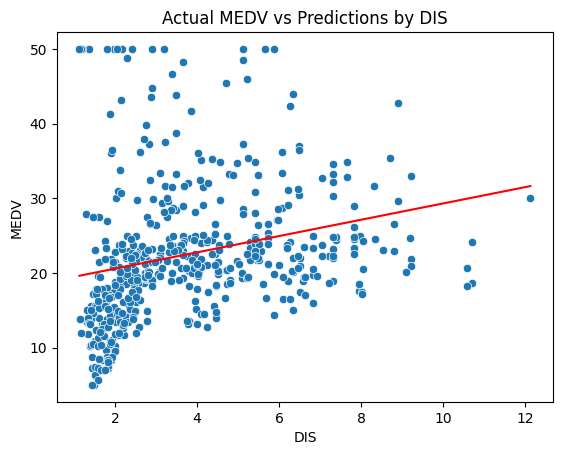

In [64]:
g = sns.scatterplot(boston_df, x = 'DIS', y = 'MEDV')
g = sns.lineplot(x = boston_df['DIS'], y = predictions, color = 'red')
g.set_title('Actual MEDV vs Predictions by DIS')

In [65]:
print("Conclusion: an additional weighted distance to the centres will cause $1,092 increase of house value.")

Conclusion: an additional weighted distance to the centres will cause $1,092 increase of house value.
